In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('data_merged.csv')

## 결측치 처리

In [3]:
df.isnull().sum()

SCHUL_NM             0
ADRCD_NM             0
SCHUL_KND_SC_CODE    0
SEM_STR              0
AIR_BACT             0
FALL_BACT            0
MITE                 0
RN                   0
O3                   0
ASBESTOS             0
dtype: int64

In [4]:
df[df['SEM_STR'].isnull()]

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS


In [5]:
df[df['SCHUL_NM'] == '서울개포초등학교']

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS


In [6]:
df.drop(6, axis=0, inplace=True)

In [7]:
df.isnull().sum()

SCHUL_NM             0
ADRCD_NM             0
SCHUL_KND_SC_CODE    0
SEM_STR              0
AIR_BACT             0
FALL_BACT            0
MITE                 0
RN                   0
O3                   0
ASBESTOS             0
dtype: int64

In [8]:
df.to_csv('data_merged.csv', index=False)

## 데이터 시각화

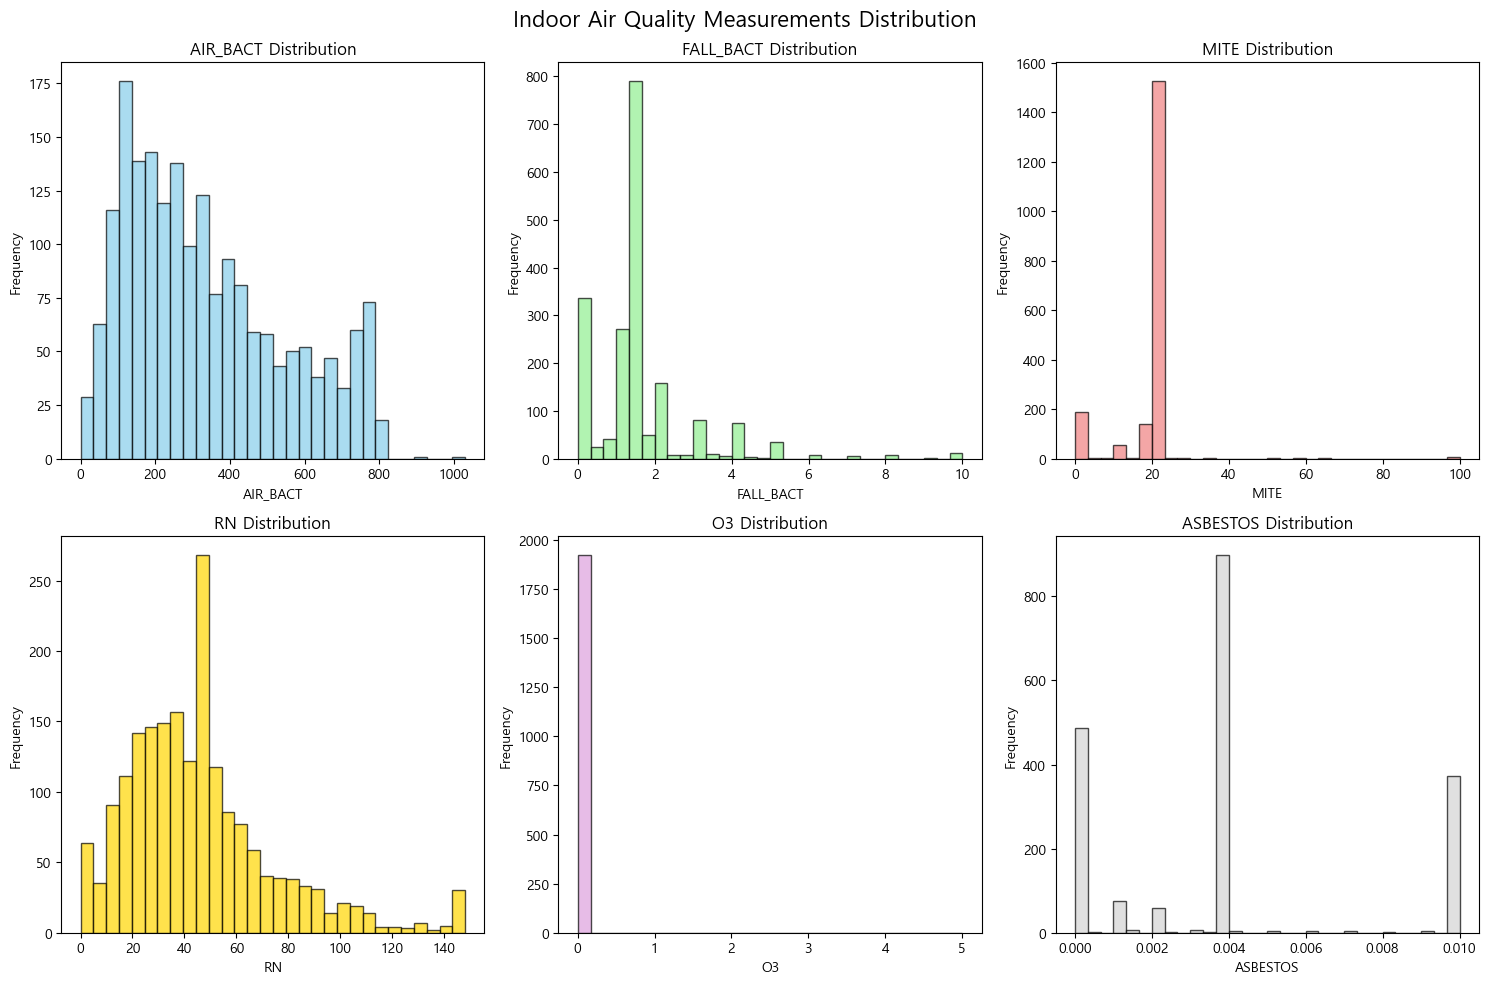

In [9]:
# 1. 전체 데이터 분포 히스토그램
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Indoor Air Quality Measurements Distribution', fontsize=16)

pollutants = ['AIR_BACT', 'FALL_BACT', 'MITE', 'RN', 'O3', 'ASBESTOS']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum', 'lightgray']

for i, (pollutant, color) in enumerate(zip(pollutants, colors)):
    row, col = i // 3, i % 3
    axes[row, col].hist(df[pollutant], bins=30, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{pollutant} Distribution')
    axes[row, col].set_xlabel(pollutant)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

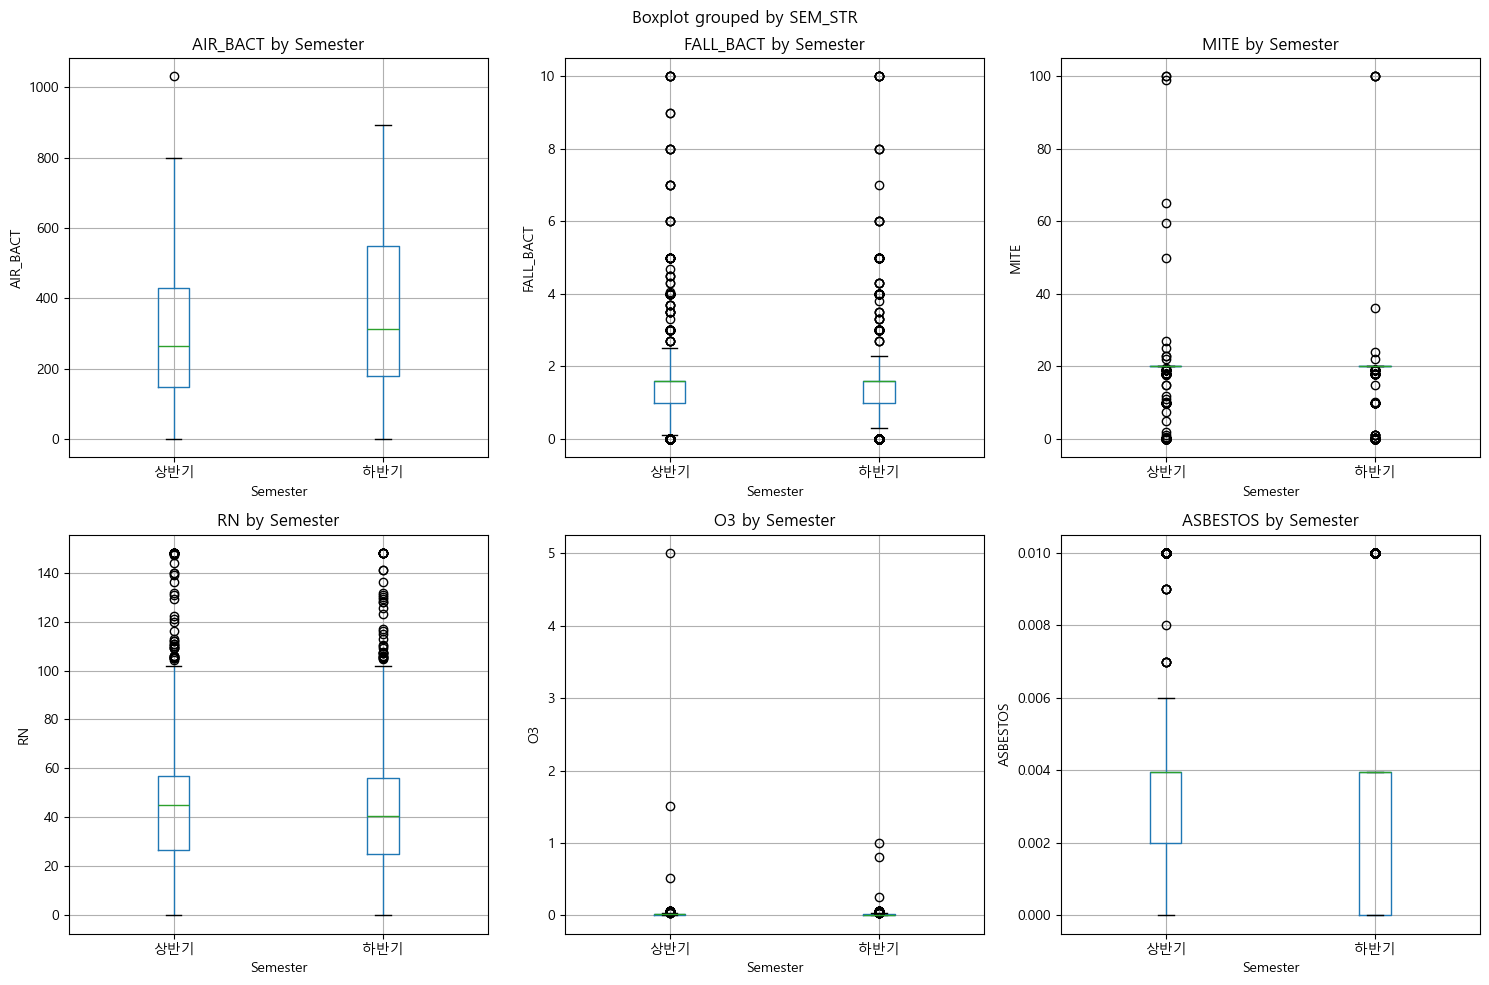

In [10]:
# 2. 박스플롯으로 오염물질별 분포 비교
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pollutant Levels by Semester', fontsize=16)

for i, pollutant in enumerate(pollutants):
    row, col = i // 3, i % 3
    df.boxplot(column=pollutant, by='SEM_STR', ax=axes[row, col])
    axes[row, col].set_title(f'{pollutant} by Semester')
    axes[row, col].set_xlabel('Semester')
    axes[row, col].set_ylabel(pollutant)

plt.tight_layout()
plt.show()

In [29]:
df[df['AIR_BACT'] >= 800].sort_values(by='AIR_BACT', ascending=False)

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS
434,서울군자초등학교,서울특별시 동대문구,2,상반기,1030.5,1.60323,0.000000,29.700000,0.011,0.010000
801,서울경수초등학교,서울특별시 성동구,2,하반기,893.5,1.60323,20.000000,32.500000,0.020,0.000000
137,서울문정초등학교,서울특별시 송파구,2,하반기,800.0,10.00000,100.000000,148.000000,0.060,0.010000
350,서울대방초등학교,서울특별시 영등포구,2,상반기,800.0,10.00000,100.000000,62.700000,0.060,0.010000
182,서울잠실초등학교,서울특별시 송파구,2,상반기,800.0,1.60323,17.980965,45.430749,0.060,0.003965
1021,서울보라매초등학교,서울특별시 동작구,2,하반기,800.0,10.00000,100.000000,1.480000,0.060,0.000000
1323,세일중학교,서울특별시 금천구,3,상반기,800.0,10.00000,100.000000,148.000000,0.060,0.003965
1594,장위중학교,서울특별시 성북구,3,하반기,800.0,1.60323,100.000000,148.000000,0.060,0.010000
1712,관악고등학교,서울특별시 영등포구,4,하반기,800.0,1.60323,17.980965,148.000000,0.060,0.003965


In [30]:
df[df['FALL_BACT'] >= 10].sort_values(by='FALL_BACT', ascending=False)

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS
137,서울문정초등학교,서울특별시 송파구,2,하반기,800.0,10.0,100.0,148.00,0.0600,0.010000
350,서울대방초등학교,서울특별시 영등포구,2,상반기,800.0,10.0,100.0,62.70,0.0600,0.010000
473,서울안평초등학교,서울특별시 동대문구,2,하반기,613.0,10.0,20.0,42.60,0.0100,0.000000
493,서울중랑초등학교,서울특별시 중랑구,2,하반기,285.0,10.0,20.0,26.40,0.0100,0.010000
557,서울신상도초등학교,서울특별시 동작구,2,하반기,398.0,10.0,20.0,12.30,0.0000,0.010000
561,서울신우초등학교,서울특별시 관악구,2,하반기,778.0,10.0,20.0,22.00,0.0200,0.010000
664,서울자운초등학교,서울특별시 도봉구,2,상반기,327.0,10.0,20.0,77.00,0.0200,0.003965
1021,서울보라매초등학교,서울특별시 동작구,2,하반기,800.0,10.0,100.0,1.48,0.0600,0.000000
1108,서울세명초등학교,서울특별시 강남구,2,상반기,792.0,10.0,0.0,48.70,0.0150,0.003965
1127,서울대학교사범대학부설중학교,서울특별시 성북구,3,상반기,215.0,10.0,20.0,47.20,0.0175,0.003965


In [31]:
df[df['MITE'] >= 100].sort_values(by='MITE', ascending=False)

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS
137,서울문정초등학교,서울특별시 송파구,2,하반기,800.0,10.00000,100.0,148.00,0.06,0.010000
350,서울대방초등학교,서울특별시 영등포구,2,상반기,800.0,10.00000,100.0,62.70,0.06,0.010000
1021,서울보라매초등학교,서울특별시 동작구,2,하반기,800.0,10.00000,100.0,1.48,0.06,0.000000
1323,세일중학교,서울특별시 금천구,3,상반기,800.0,10.00000,100.0,148.00,0.06,0.003965
1594,장위중학교,서울특별시 성북구,3,하반기,800.0,1.60323,100.0,148.00,0.06,0.010000
1776,여의도고등학교,서울특별시 영등포구,4,하반기,323.0,1.60323,100.0,32.20,0.01,0.010000


In [32]:
df[df['RN'] >= 148].sort_values(by='RN', ascending=False)

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS
137,서울문정초등학교,서울특별시 송파구,2,하반기,800.00,10.00000,100.000000,148.0,0.0600,0.010000
326,서울고산초등학교,서울특별시 구로구,2,상반기,345.60,1.60323,19.000000,148.0,0.0200,0.002000
362,서울동구로초등학교,서울특별시 구로구,2,상반기,326.10,1.00000,20.000000,148.0,0.0200,0.002000
402,서울영동초등학교,서울특별시 영등포구,2,상반기,559.20,1.60323,20.000000,148.0,0.0100,0.002000
408,서울영서초등학교,서울특별시 구로구,2,상반기,311.60,2.70000,20.000000,148.0,0.0100,0.002000
430,서울정심초등학교,서울특별시 금천구,2,상반기,428.70,1.60323,20.000000,148.0,0.0100,0.003965
431,서울정심초등학교,서울특별시 금천구,2,하반기,625.00,1.60323,17.980965,148.0,0.0600,0.003965
530,서울대림초등학교,서울특별시 동작구,2,상반기,452.00,0.00000,20.000000,148.0,0.0310,0.010000
766,서울연은초등학교,서울특별시 은평구,2,상반기,88.00,1.50000,20.000000,148.0,0.0100,0.003965
1017,서울서신초등학교,서울특별시 은평구,2,하반기,721.00,2.00000,20.000000,148.0,0.0100,0.003965


In [33]:
df[df['O3'] >= 0.06].sort_values(by='O3', ascending=False)

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS
1137,압구정중학교,서울특별시 강남구,3,상반기,135.50,0.20000,0.200000,16.400000,5.003,0.010000
674,서울창경초등학교,서울특별시 도봉구,2,상반기,70.00,7.00000,20.000000,1.000000,1.505,0.010000
1664,위례솔중학교,서울특별시 송파구,3,하반기,3.00,0.00000,1.000000,1.000000,1.000,0.000000
1760,석관고등학교,서울특별시 성북구,4,하반기,271.00,0.00000,20.000000,54.000000,0.800,0.000000
1851,서울웹툰애니메이션고등학교,서울특별시 서초구,4,상반기,318.00,1.60323,17.980965,45.430749,0.515,0.010000
933,서울금양초등학교,서울특별시 용산구,2,하반기,572.00,6.00000,0.200000,0.000000,0.260,0.000000
137,서울문정초등학교,서울특별시 송파구,2,하반기,800.00,10.00000,100.000000,148.000000,0.060,0.010000
182,서울잠실초등학교,서울특별시 송파구,2,상반기,800.00,1.60323,17.980965,45.430749,0.060,0.003965
313,서울치현초등학교,서울특별시 강서구,2,하반기,626.20,1.70000,20.000000,109.000000,0.060,0.010000
499,서울중흥초등학교,서울특별시 중랑구,2,하반기,377.10,4.30000,19.000000,34.000000,0.060,0.003965


In [34]:
df[df['ASBESTOS'] >= 0.01].sort_values(by='ASBESTOS', ascending=False)

,SCHUL_NM,ADRCD_NM,SCHUL_KND_SC_CODE,SEM_STR,AIR_BACT,FALL_BACT,MITE,RN,O3,ASBESTOS
1880,효문고등학교,서울특별시 도봉구,4,하반기,229.0,1.60323,20.0,73.0,0.0300,0.01
6,서울논현초등학교,서울특별시 강남구,2,상반기,424.5,0.00000,20.0,29.0,0.0145,0.01
7,서울논현초등학교,서울특별시 강남구,2,하반기,228.0,1.60323,20.0,32.1,0.0100,0.01
8,서울대곡초등학교,서울특별시 강남구,2,상반기,298.0,1.60323,0.0,35.8,0.0120,0.01
1772,양재고등학교,서울특별시 서초구,4,하반기,612.0,1.60323,20.0,36.1,0.0100,0.01
...,...,...,...,...,...,...,...,...,...,...
25,서울도곡초등학교,서울특별시 강남구,2,하반기,527.0,1.60323,20.0,62.8,0.0000,0.01
21,서울대치초등학교,서울특별시 강남구,2,하반기,274.0,0.00000,0.0,46.0,0.0100,0.01
17,서울대진초등학교,서울특별시 강남구,2,하반기,271.0,1.60323,10.0,45.3,0.0100,0.01
16,서울대진초등학교,서울특별시 강남구,2,상반기,763.0,0.00000,20.0,24.7,0.0290,0.01


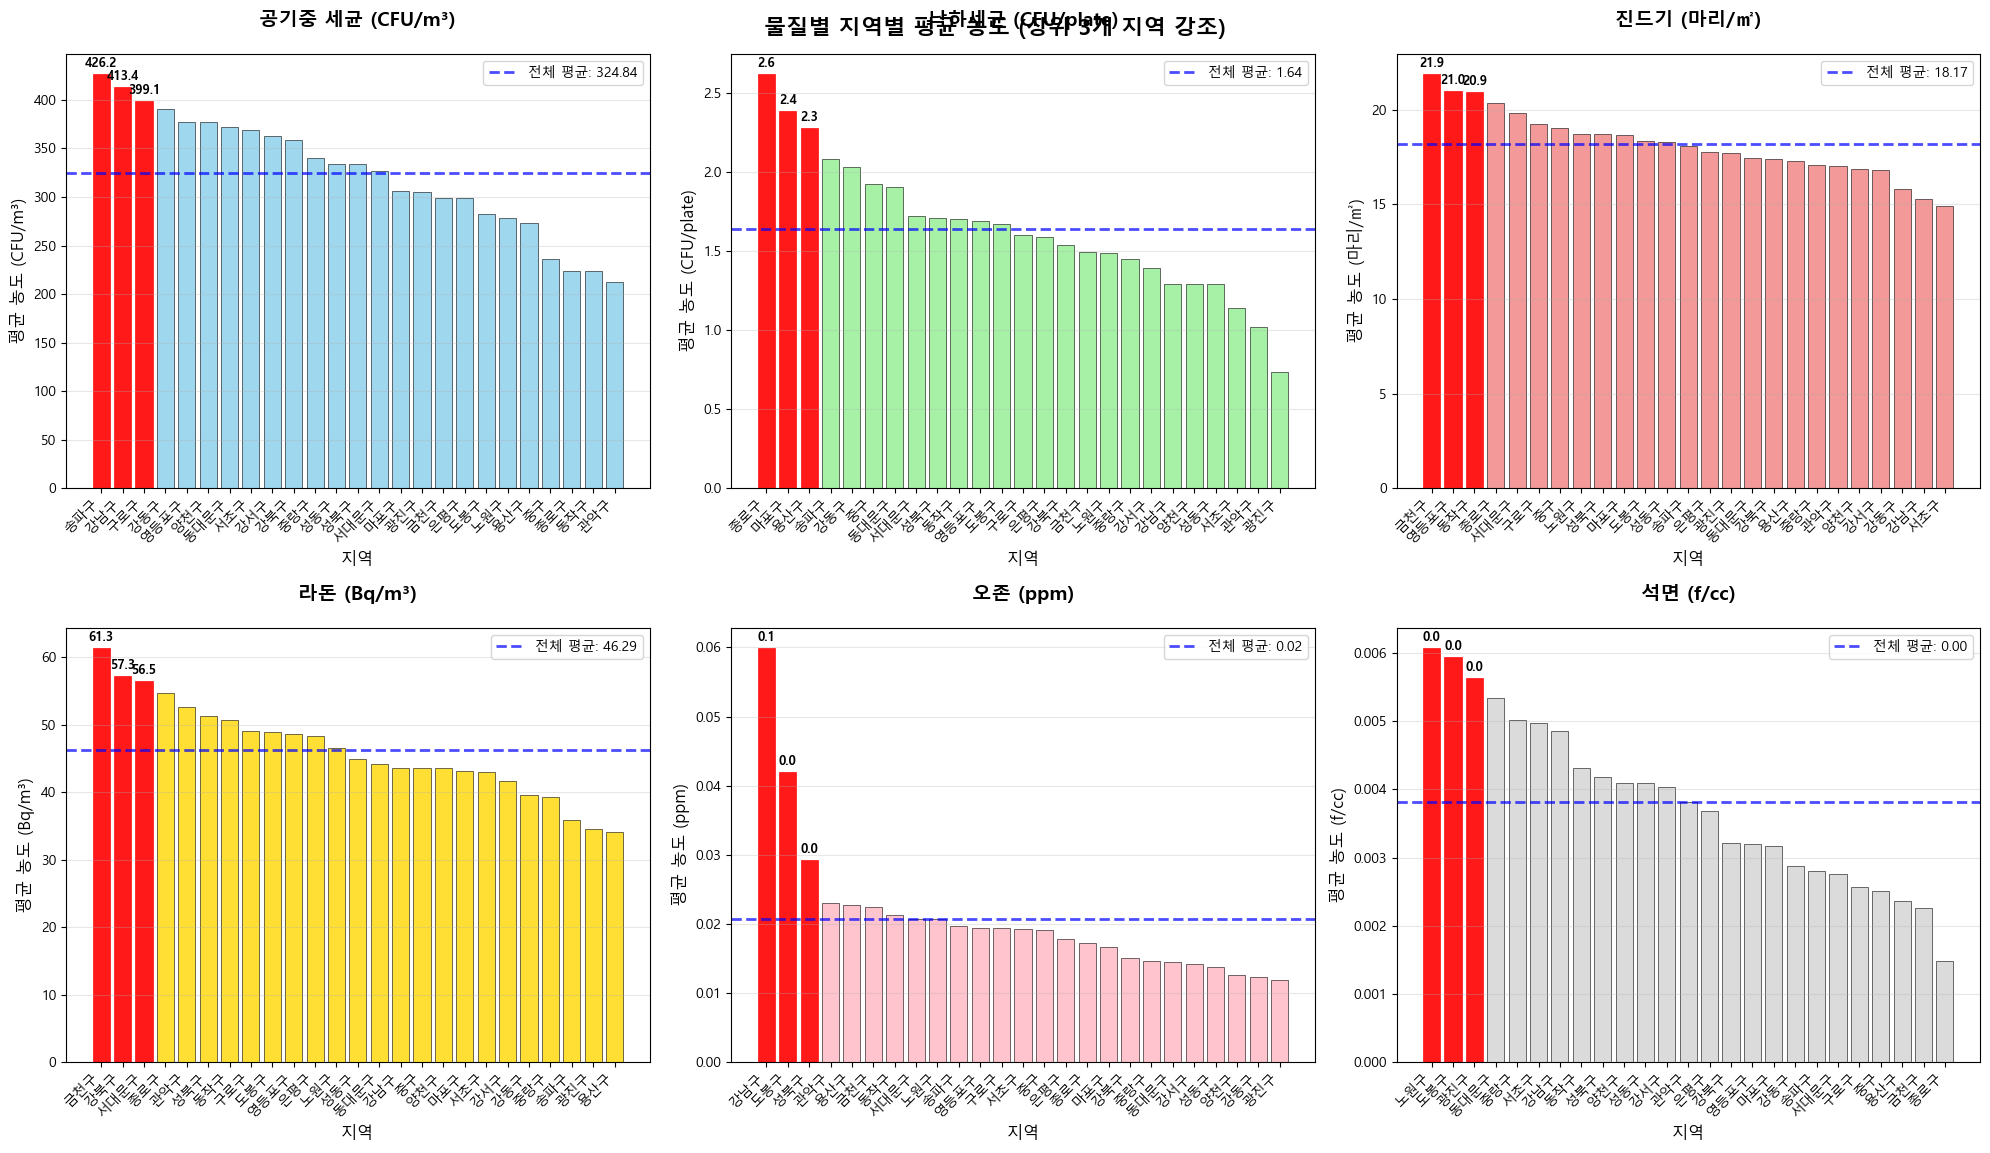

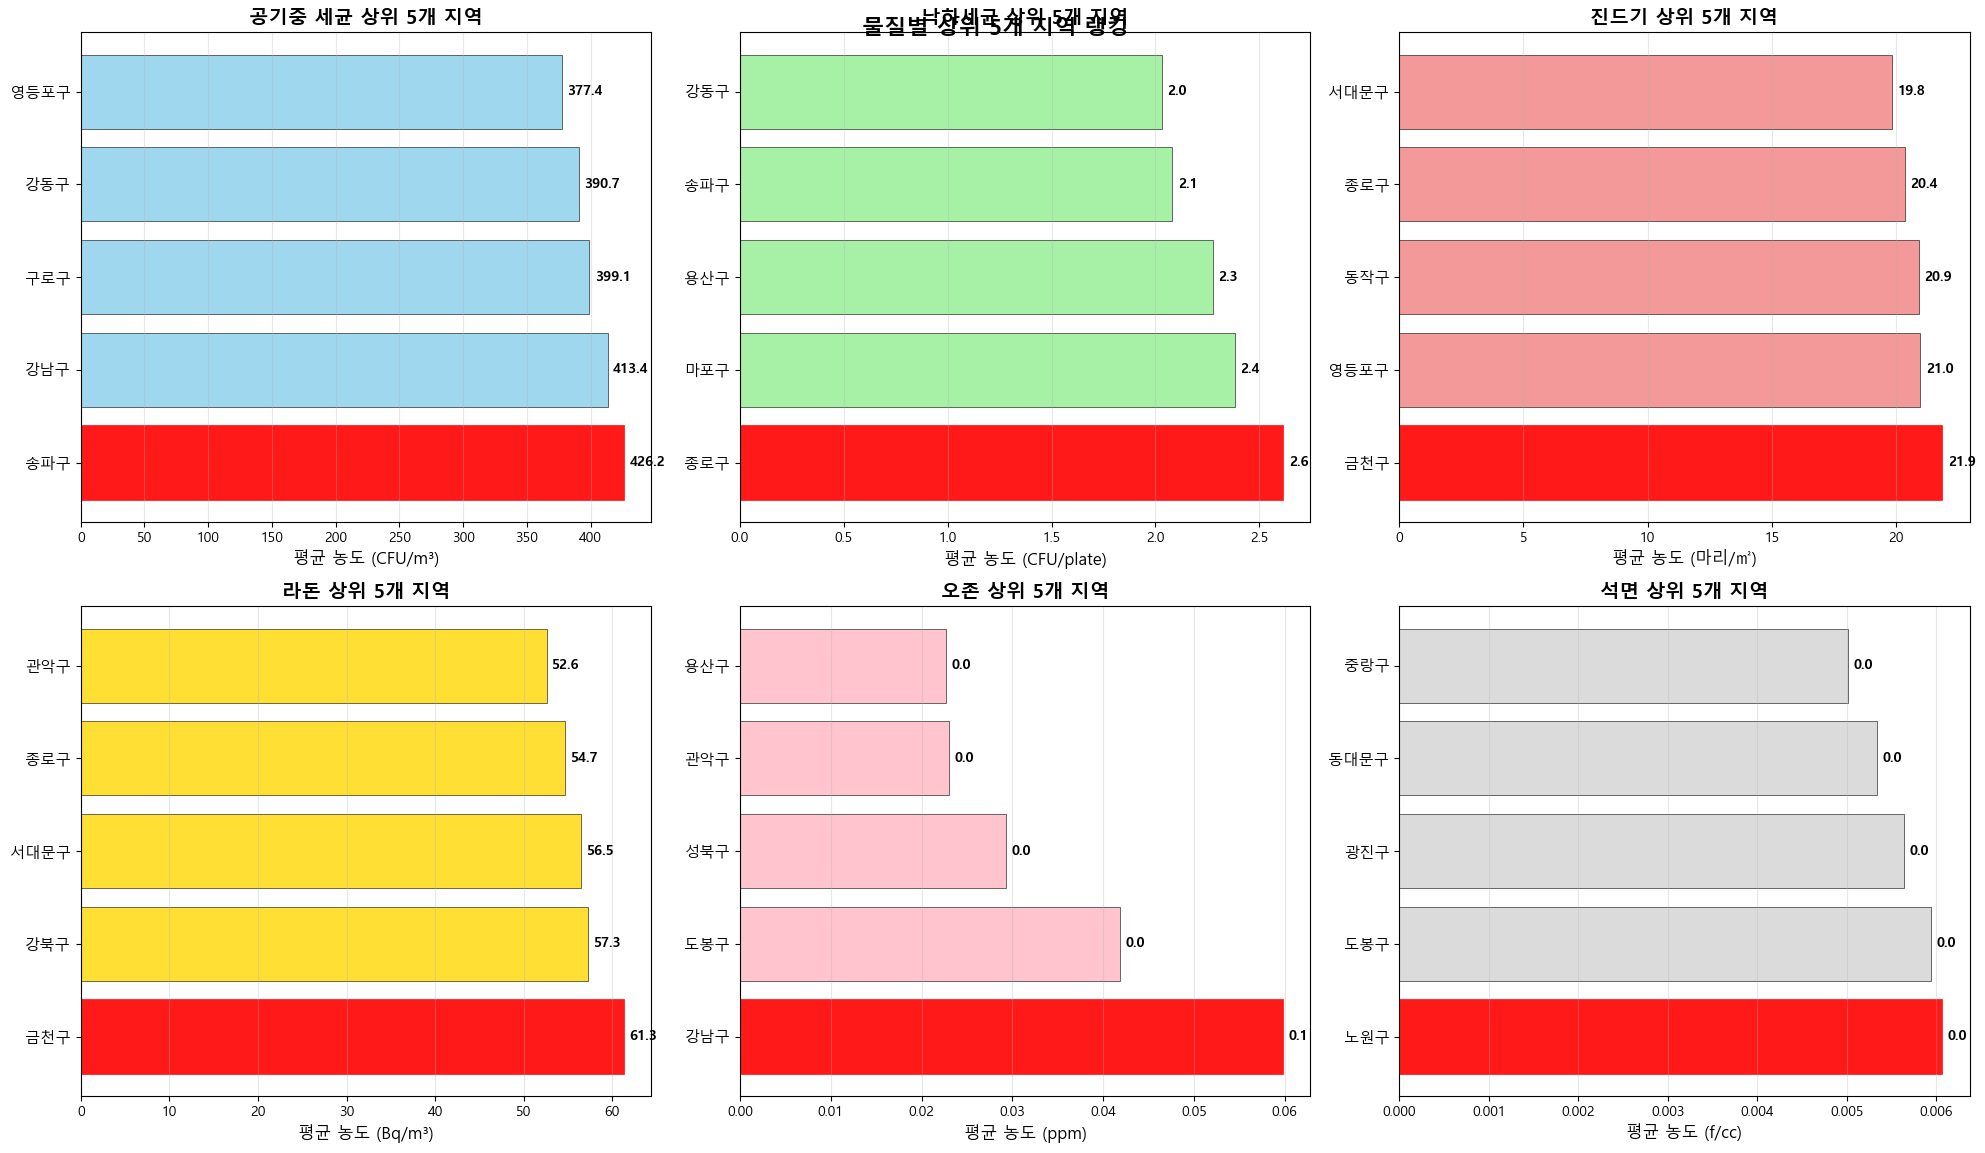

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('data_merged.csv')

# 물질별 정보
substances_info = {
    'AIR_BACT': {'name': '공기중 세균', 'unit': 'CFU/m³', 'color': 'skyblue'},
    'FALL_BACT': {'name': '낙하세균', 'unit': 'CFU/plate', 'color': 'lightgreen'},
    'MITE': {'name': '진드기', 'unit': '마리/㎡', 'color': 'lightcoral'},
    'RN': {'name': '라돈', 'unit': 'Bq/m³', 'color': 'gold'},
    'O3': {'name': '오존', 'unit': 'ppm', 'color': 'lightpink'},
    'ASBESTOS': {'name': '석면', 'unit': 'f/cc', 'color': 'lightgray'}
}

# 지역명 단축
df['지역'] = df['ADRCD_NM'].str.replace('서울특별시 ', '')

# 물질별 지역별 평균 계산
regional_averages = {}
for substance in substances_info.keys():
    regional_avg = df.groupby('지역')[substance].mean().sort_values(ascending=False)
    regional_averages[substance] = regional_avg

# 1. 개별 물질별 막대그래프 (6개 서브플롯)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (substance, info) in enumerate(substances_info.items()):
    ax = axes[idx]
    data = regional_averages[substance]
    
    bars = ax.bar(range(len(data)), data.values, color=info['color'], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # 상위 3개 지역 강조
    for i in range(min(3, len(bars))):
        bars[i].set_color('red')
        bars[i].set_alpha(0.9)
    
    ax.set_title(f'{info["name"]} ({info["unit"]})', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel(f'평균 농도 ({info["unit"]})', fontsize=12)
    ax.set_xlabel('지역', fontsize=12)
    
    # x축 라벨 설정
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.index, rotation=45, ha='right', fontsize=10)
    
    # 그리드 추가
    ax.grid(True, axis='y', alpha=0.3)
    
    # 평균선 추가
    avg_value = data.mean()
    ax.axhline(y=avg_value, color='blue', linestyle='--', alpha=0.7, linewidth=2, label=f'전체 평균: {avg_value:.2f}')
    ax.legend(fontsize=10)
    
    # 상위 3개 지역에 값 표시
    for i in range(min(3, len(data))):
        ax.text(i, data.iloc[i] + data.max()*0.01, f'{data.iloc[i]:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('물질별 지역별 평균 농도 (상위 3개 지역 강조)', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# 2. 물질별 상위 5개 지역 비교 (가로 막대그래프)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (substance, info) in enumerate(substances_info.items()):
    ax = axes[idx]
    data = regional_averages[substance].head(5)
    
    bars = ax.barh(range(len(data)), data.values, color=info['color'], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # 1위 지역 강조
    bars[0].set_color('red')
    bars[0].set_alpha(0.9)
    
    ax.set_title(f'{info["name"]} 상위 5개 지역', fontsize=14, fontweight='bold')
    ax.set_xlabel(f'평균 농도 ({info["unit"]})', fontsize=12)
    
    # y축 라벨 설정 (역순으로 표시)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index, fontsize=11)
    
    # 그리드 추가
    ax.grid(True, axis='x', alpha=0.3)
    
    # 값 표시
    for i, (region, value) in enumerate(data.items()):
        ax.text(value + data.max()*0.01, i, f'{value:.1f}', 
                ha='left', va='center', fontweight='bold', fontsize=10)

plt.suptitle('물질별 상위 5개 지역 랭킹', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

=== 고농도 오염 기준 ===
공기중 세균: >= 800
낙하세균: >= 10
진드기: >= 100
라돈: >= 148
오존: >= 0.06
석면: >= 0.01

=== 고농도 오염 데이터 현황 ===
전체 데이터 수: 1932
고농도 오염 데이터 수: 421
고농도 비율: 21.79%

=== 지역별 고농도 오염 데이터 개수 ===
 1. 노원구: 64건
 2. 강남구: 38건
 3. 도봉구: 38건
 4. 광진구: 26건
 5. 서초구: 25건
 6. 동대문구: 24건
 7. 중랑구: 24건
 8. 양천구: 20건
 9. 강서구: 19건
10. 성북구: 19건
11. 영등포구: 16건
12. 송파구: 14건
13. 동작구: 14건
14. 성동구: 13건
15. 관악구: 13건
16. 구로구: 10건
17. 마포구: 9건
18. 은평구: 9건
19. 금천구: 7건
20. 서대문구: 6건
21. 용산구: 6건
22. 강북구: 4건
23. 강동구: 2건
24. 중구: 1건


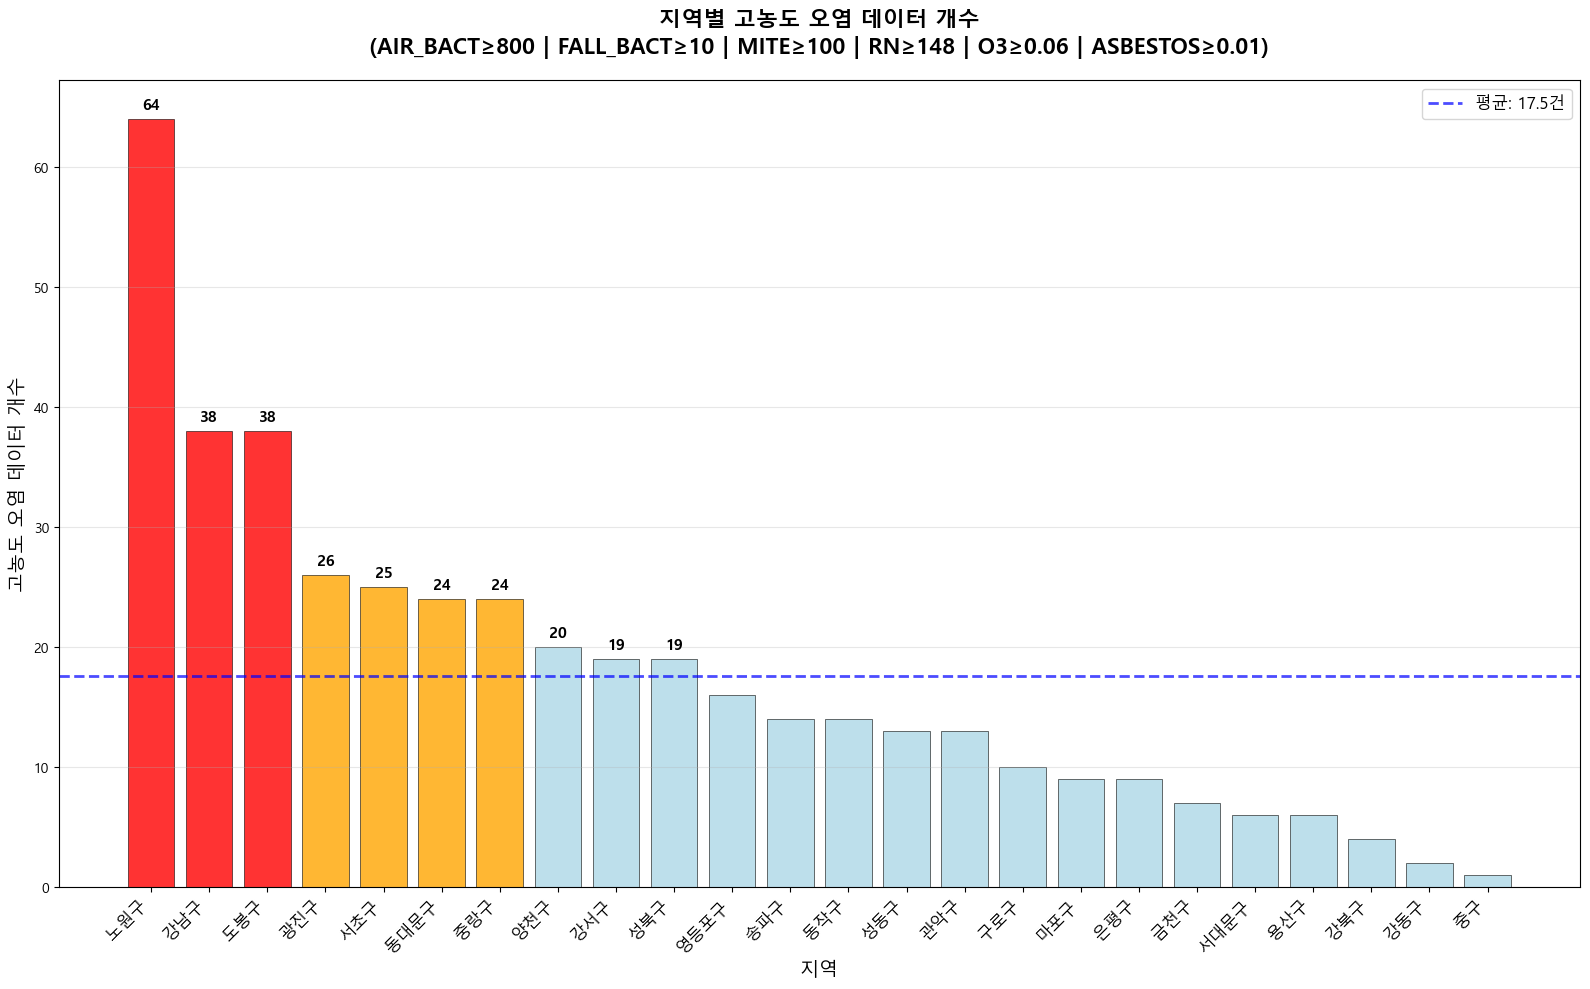


=== 물질별 고농도 데이터 개수 ===
석면: 372건
오존: 33건
라돈: 26건
낙하세균: 11건
공기중 세균: 9건
진드기: 6건


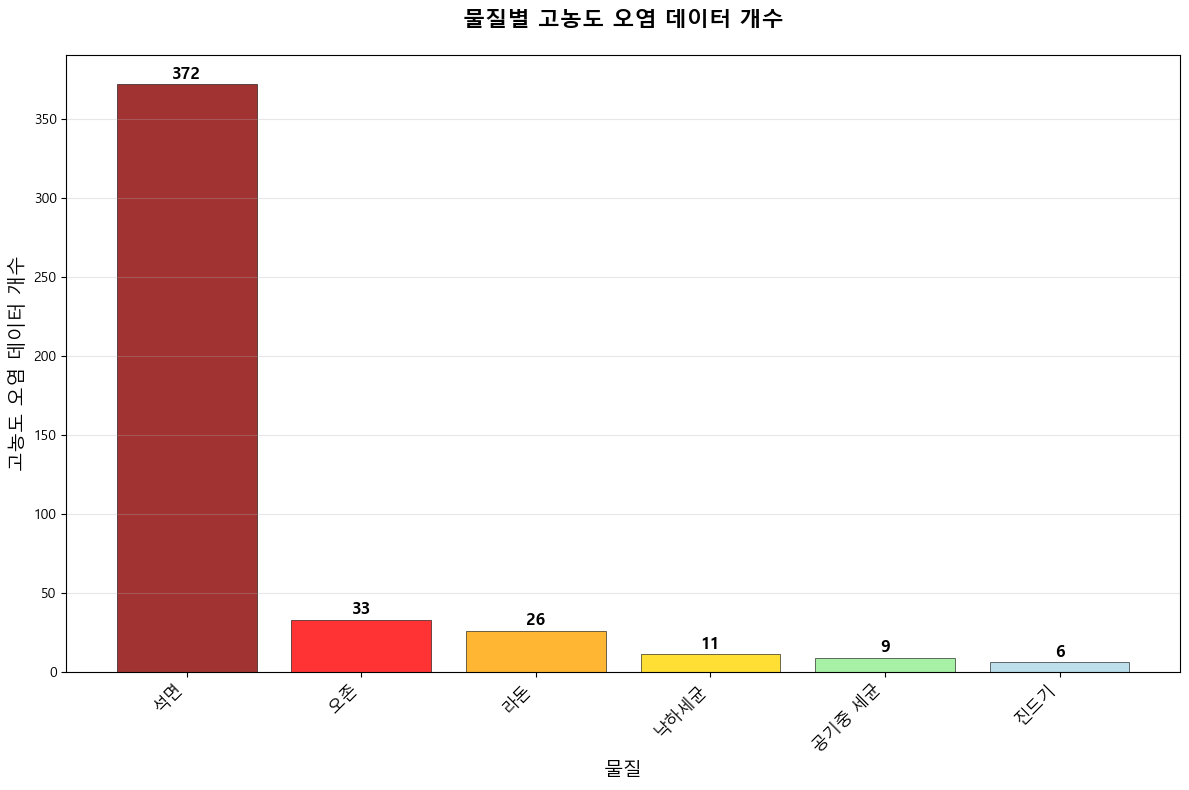

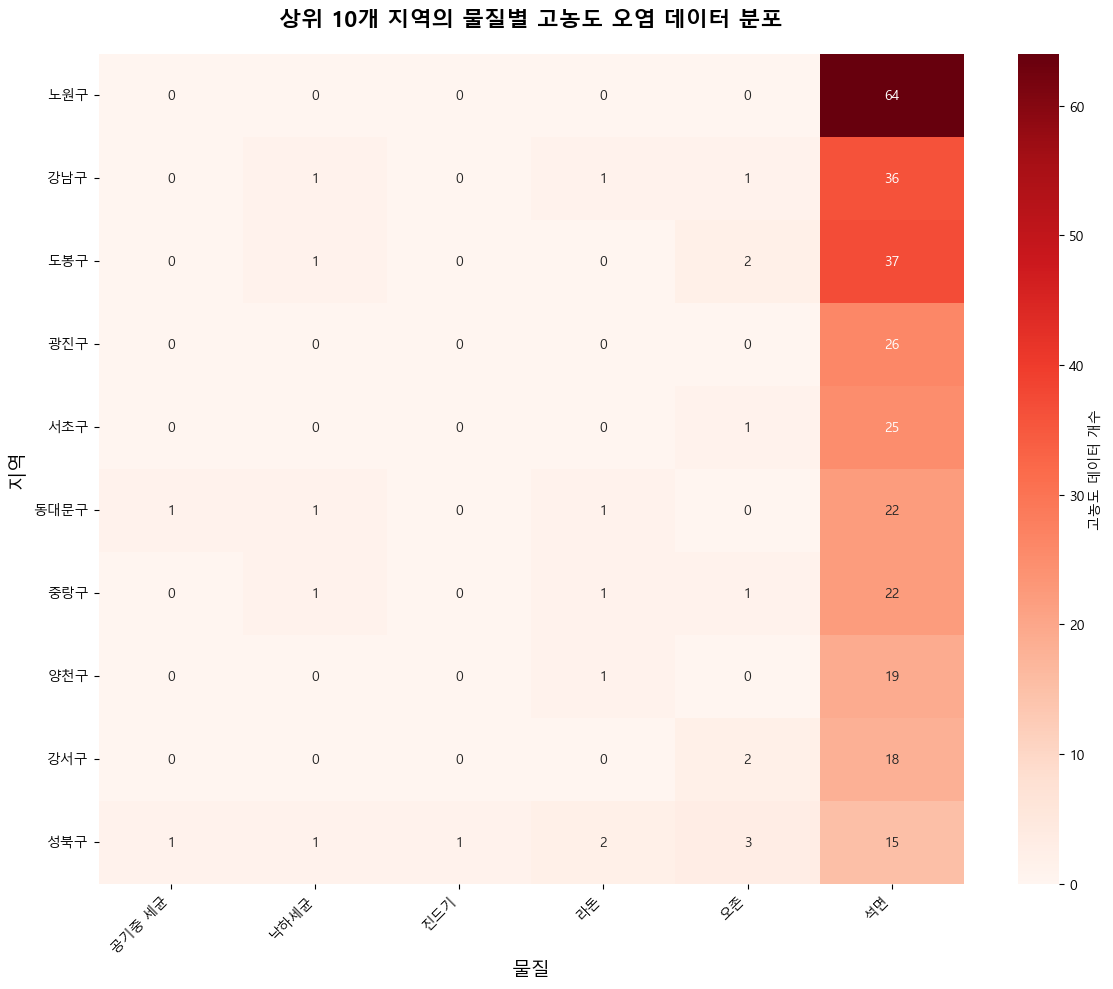

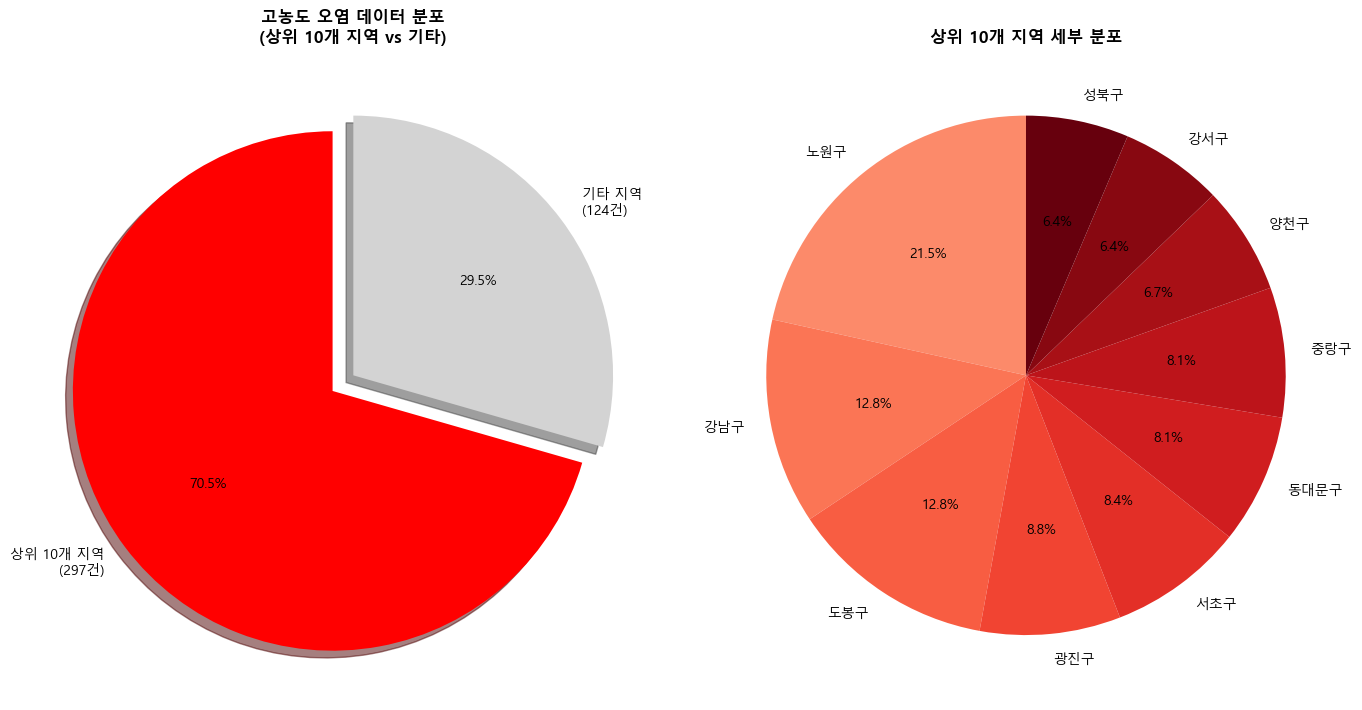


=== 지역별 고농도 오염 비율 (상위 10개) ===
 1. 도봉구: 50.0% (38/76)
 2. 노원구: 49.2% (64/130)
 3. 광진구: 43.3% (26/60)
 4. 동대문구: 40.0% (24/60)
 5. 강남구: 34.2% (38/111)
 6. 중랑구: 30.8% (24/78)
 7. 서초구: 30.5% (25/82)
 8. 성북구: 25.0% (19/76)
 9. 양천구: 20.0% (20/100)
10. 동작구: 19.4% (14/72)


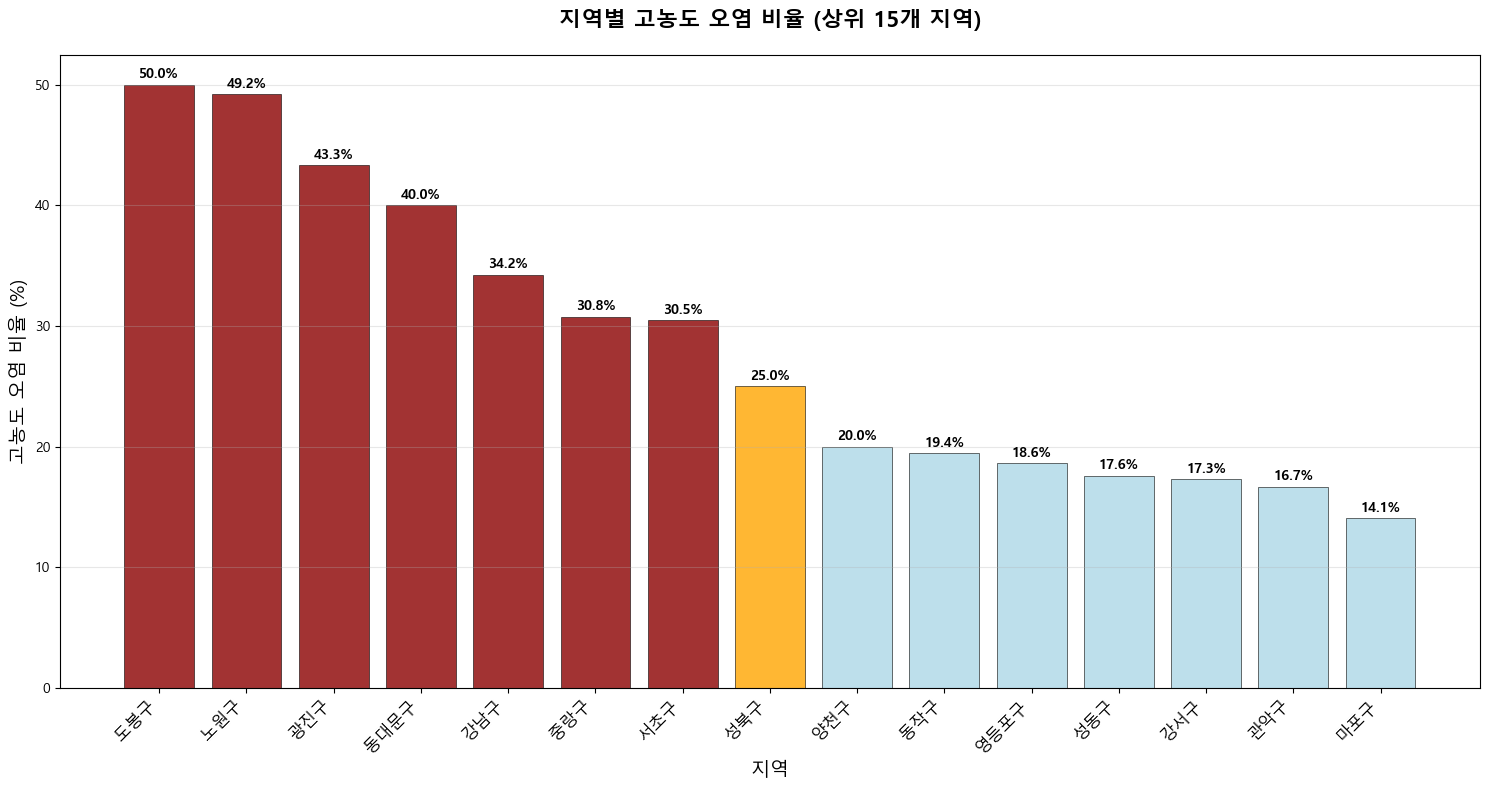


=== 최종 분석 결과 ===
🏆 고농도 오염 데이터 최다 지역: 노원구 (64건)
📊 고농도 오염 비율 최고 지역: 도봉구 (50.0%)
⚠️  가장 문제가 되는 물질: 석면 (372건)
📈 전체 고농도 오염 비율: 21.8%


In [38]:
# 고농도 오염 기준 정의
high_pollution_criteria = {
    'AIR_BACT': 800,
    'FALL_BACT': 10,
    'MITE': 100,
    'RN': 148,
    'O3': 0.06,
    'ASBESTOS': 0.01
}

# 물질명 매핑
substance_names = {
    'AIR_BACT': '공기중 세균',
    'FALL_BACT': '낙하세균',
    'MITE': '진드기',
    'RN': '라돈',
    'O3': '오존',
    'ASBESTOS': '석면'
}

print("=== 고농도 오염 기준 ===")
for substance, threshold in high_pollution_criteria.items():
    print(f"{substance_names[substance]}: >= {threshold}")

# 지역명 단축
df['지역'] = df['ADRCD_NM'].str.replace('서울특별시 ', '')

# 고농도 오염 조건에 해당하는 데이터 필터링
high_pollution_mask = (
    (df['AIR_BACT'] >= 800) |
    (df['FALL_BACT'] >= 10) |
    (df['MITE'] >= 100) |
    (df['RN'] >= 148) |
    (df['O3'] >= 0.06) |
    (df['ASBESTOS'] >= 0.01)
)

high_pollution_df = df[high_pollution_mask].copy()

print(f"\n=== 고농도 오염 데이터 현황 ===")
print(f"전체 데이터 수: {len(df)}")
print(f"고농도 오염 데이터 수: {len(high_pollution_df)}")
print(f"고농도 비율: {len(high_pollution_df)/len(df)*100:.2f}%")

# 지역별 고농도 오염 데이터 개수
regional_high_pollution = high_pollution_df['지역'].value_counts().sort_values(ascending=False)
print(f"\n=== 지역별 고농도 오염 데이터 개수 ===")
for i, (region, count) in enumerate(regional_high_pollution.items(), 1):
    print(f"{i:2d}. {region}: {count}건")

# 1. 지역별 고농도 오염 데이터 개수 막대그래프
plt.figure(figsize=(16, 10))

# 메인 막대그래프
bars = plt.bar(range(len(regional_high_pollution)), regional_high_pollution.values, 
               color=['red' if i < 3 else 'orange' if i < 7 else 'lightblue' 
                      for i in range(len(regional_high_pollution))],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('지역별 고농도 오염 데이터 개수\n(AIR_BACT≥800 | FALL_BACT≥10 | MITE≥100 | RN≥148 | O3≥0.06 | ASBESTOS≥0.01)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('지역', fontsize=14)
plt.ylabel('고농도 오염 데이터 개수', fontsize=14)

# x축 레이블
plt.xticks(range(len(regional_high_pollution)), regional_high_pollution.index, 
           rotation=45, ha='right', fontsize=12)

# 상위 10개 지역에 값 표시
for i in range(min(10, len(bars))):
    height = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 평균선 추가
avg_value = regional_high_pollution.mean()
plt.axhline(y=avg_value, color='blue', linestyle='--', alpha=0.7, linewidth=2,
            label=f'평균: {avg_value:.1f}건')

plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 물질별 고농도 데이터 개수 분석
substance_high_counts = {}
for substance, threshold in high_pollution_criteria.items():
    count = len(df[df[substance] >= threshold])
    substance_high_counts[substance_names[substance]] = count

substance_counts_df = pd.DataFrame(list(substance_high_counts.items()), 
                                   columns=['물질', '고농도_데이터수'])
substance_counts_df = substance_counts_df.sort_values('고농도_데이터수', ascending=False)

print(f"\n=== 물질별 고농도 데이터 개수 ===")
for _, row in substance_counts_df.iterrows():
    print(f"{row['물질']}: {row['고농도_데이터수']}건")

# 3. 물질별 고농도 데이터 개수 막대그래프
plt.figure(figsize=(12, 8))
colors = ['darkred', 'red', 'orange', 'gold', 'lightgreen', 'lightblue']
bars = plt.bar(substance_counts_df['물질'], substance_counts_df['고농도_데이터수'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('물질별 고농도 오염 데이터 개수', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('물질', fontsize=14)
plt.ylabel('고농도 오염 데이터 개수', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 상위 10개 지역의 물질별 세부 분석
top_10_regions = regional_high_pollution.head(10).index

# 지역별 물질별 고농도 데이터 매트릭스 생성
region_substance_matrix = pd.DataFrame(index=top_10_regions, 
                                       columns=list(substance_names.values()))

for region in top_10_regions:
    region_data = high_pollution_df[high_pollution_df['지역'] == region]
    for substance, threshold in high_pollution_criteria.items():
        count = len(region_data[region_data[substance] >= threshold])
        region_substance_matrix.loc[region, substance_names[substance]] = count

region_substance_matrix = region_substance_matrix.fillna(0).astype(int)

# 5. 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(region_substance_matrix, annot=True, cmap='Reds', fmt='d', 
            cbar_kws={'label': '고농도 데이터 개수'})
plt.title('상위 10개 지역의 물질별 고농도 오염 데이터 분포', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('물질', fontsize=14)
plt.ylabel('지역', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. 파이차트: 상위 10개 지역 vs 기타
top_10_sum = regional_high_pollution.head(10).sum()
others_sum = regional_high_pollution.tail(len(regional_high_pollution)-10).sum()

plt.figure(figsize=(14, 7))

# 왼쪽: 전체 비율
plt.subplot(1, 2, 1)
sizes = [top_10_sum, others_sum]
labels = [f'상위 10개 지역\n({top_10_sum}건)', f'기타 지역\n({others_sum}건)']
colors = ['red', 'lightgray']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        explode=explode, shadow=True, startangle=90)
plt.title('고농도 오염 데이터 분포\n(상위 10개 지역 vs 기타)', fontweight='bold')

# 오른쪽: 상위 10개 지역 세부
plt.subplot(1, 2, 2)
top_10_data = regional_high_pollution.head(10)
colors_detailed = plt.cm.Reds(np.linspace(0.4, 1, 10))

plt.pie(top_10_data.values, labels=top_10_data.index, autopct='%1.1f%%',
        colors=colors_detailed, startangle=90)
plt.title('상위 10개 지역 세부 분포', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. 지역별 고농도 비율 분석 (각 지역의 전체 데이터 대비)
regional_total = df['지역'].value_counts()
regional_high_ratio = (regional_high_pollution / regional_total * 100).sort_values(ascending=False)

print(f"\n=== 지역별 고농도 오염 비율 (상위 10개) ===")
for i, (region, ratio) in enumerate(regional_high_ratio.head(10).items(), 1):
    total_count = regional_total[region]
    high_count = regional_high_pollution.get(region, 0)
    print(f"{i:2d}. {region}: {ratio:.1f}% ({high_count}/{total_count})")

# 8. 고농도 비율 막대그래프
plt.figure(figsize=(15, 8))
top_15_ratio = regional_high_ratio.head(15)

bars = plt.bar(range(len(top_15_ratio)), top_15_ratio.values,
               color=['darkred' if x > 30 else 'red' if x > 25 else 'orange' if x > 20 else 'lightblue'
                      for x in top_15_ratio.values],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('지역별 고농도 오염 비율 (상위 15개 지역)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('지역', fontsize=14)
plt.ylabel('고농도 오염 비율 (%)', fontsize=14)
plt.xticks(range(len(top_15_ratio)), top_15_ratio.index, rotation=45, ha='right', fontsize=12)

# 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 최종 요약
print(f"\n=== 최종 분석 결과 ===")
print(f"🏆 고농도 오염 데이터 최다 지역: {regional_high_pollution.index[0]} ({regional_high_pollution.iloc[0]}건)")
print(f"📊 고농도 오염 비율 최고 지역: {regional_high_ratio.index[0]} ({regional_high_ratio.iloc[0]:.1f}%)")
print(f"⚠️  가장 문제가 되는 물질: {substance_counts_df.iloc[0]['물질']} ({substance_counts_df.iloc[0]['고농도_데이터수']}건)")
print(f"📈 전체 고농도 오염 비율: {len(high_pollution_df)/len(df)*100:.1f}%")

=== 고농도 오염 기준 ===
AIR_BACT: >= 800
FALL_BACT: >= 10
MITE: >= 100
RN: >= 148
O3: >= 0.06
ASBESTOS: >= 0.01

=== 전체 데이터 현황 ===
총 데이터 수: 1932

=== 고농도 물질 개수별 분포 ===
0개 물질 초과: 1511건 (78.2%)
1개 물질 초과: 401건 (20.8%)
2개 물질 초과: 14건 (0.7%)
3개 물질 초과: 1건 (0.1%)
4개 물질 초과: 1건 (0.1%)
5개 물질 초과: 3건 (0.2%)
6개 물질 초과: 1건 (0.1%)

=== 지역별 평균 고농도 물질 개수 (상위 15개) ===
 1. 도봉구: 평균 0.53개 (총 40/76)
 2. 노원구: 평균 0.49개 (총 64/130)
 3. 광진구: 평균 0.43개 (총 26/60)
 4. 동대문구: 평균 0.42개 (총 25/60)
 5. 강남구: 평균 0.35개 (총 39/111)
 6. 중랑구: 평균 0.32개 (총 25/78)
 7. 서초구: 평균 0.32개 (총 26/82)
 8. 성북구: 평균 0.30개 (총 23/76)
 9. 영등포구: 평균 0.27개 (총 23/86)
10. 동작구: 평균 0.26개 (총 19/72)
11. 금천구: 평균 0.22개 (총 12/54)
12. 양천구: 평균 0.20개 (총 20/100)
13. 강서구: 평균 0.18개 (총 20/110)
14. 관악구: 평균 0.18개 (총 14/78)
15. 성동구: 평균 0.18개 (총 13/74)


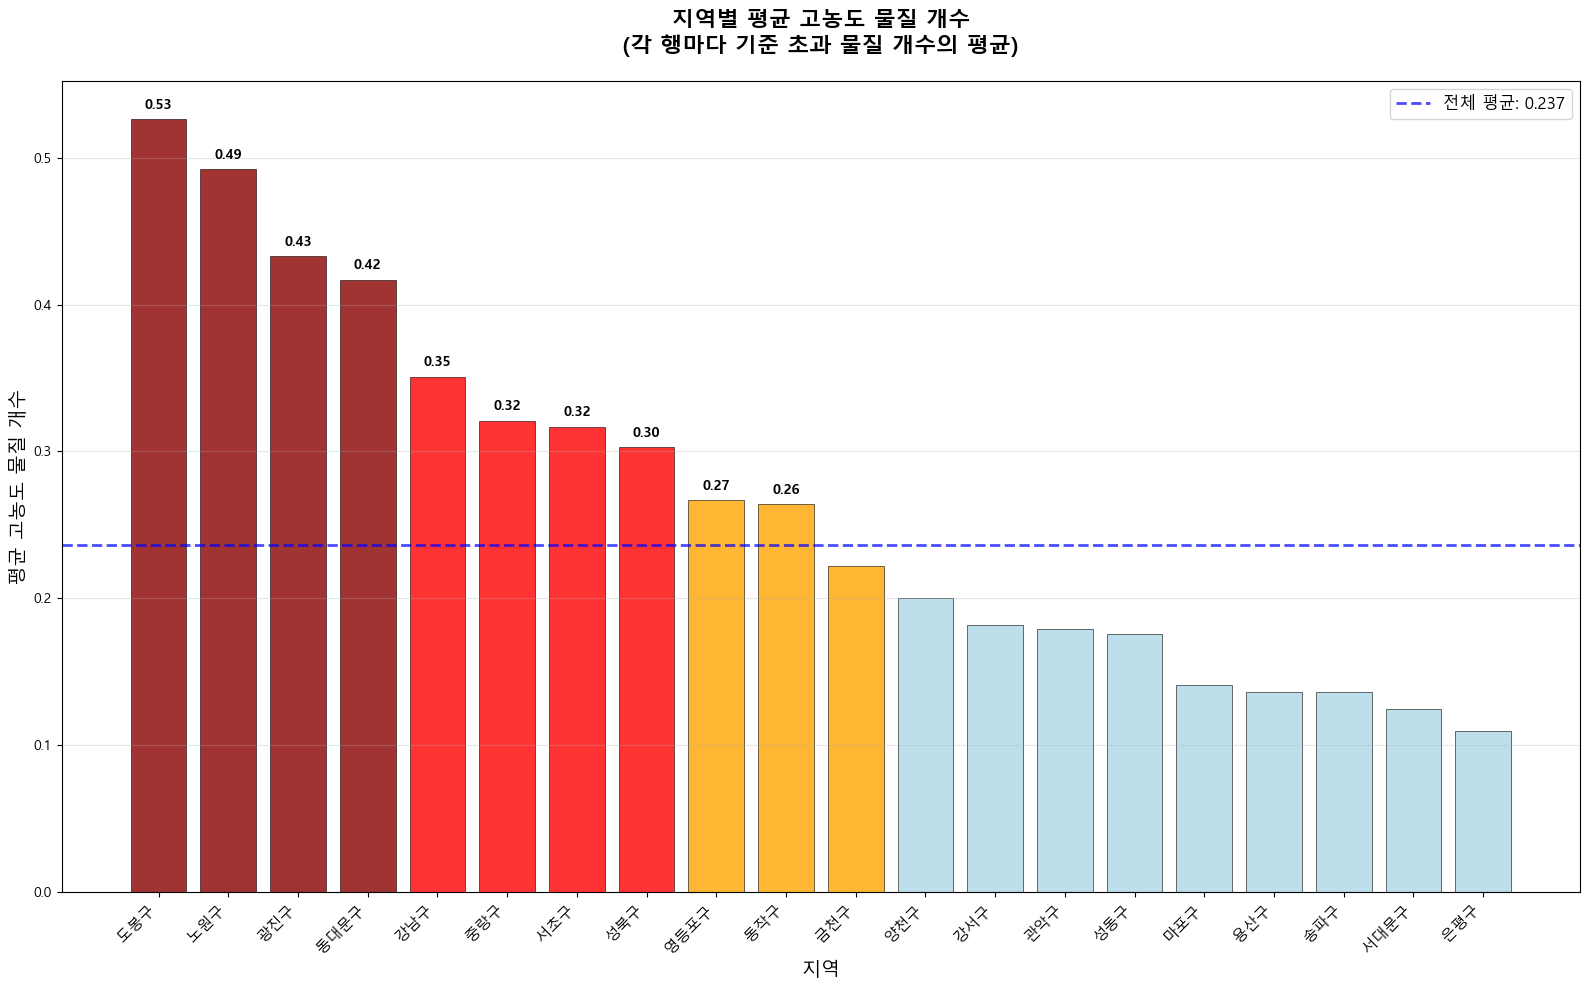

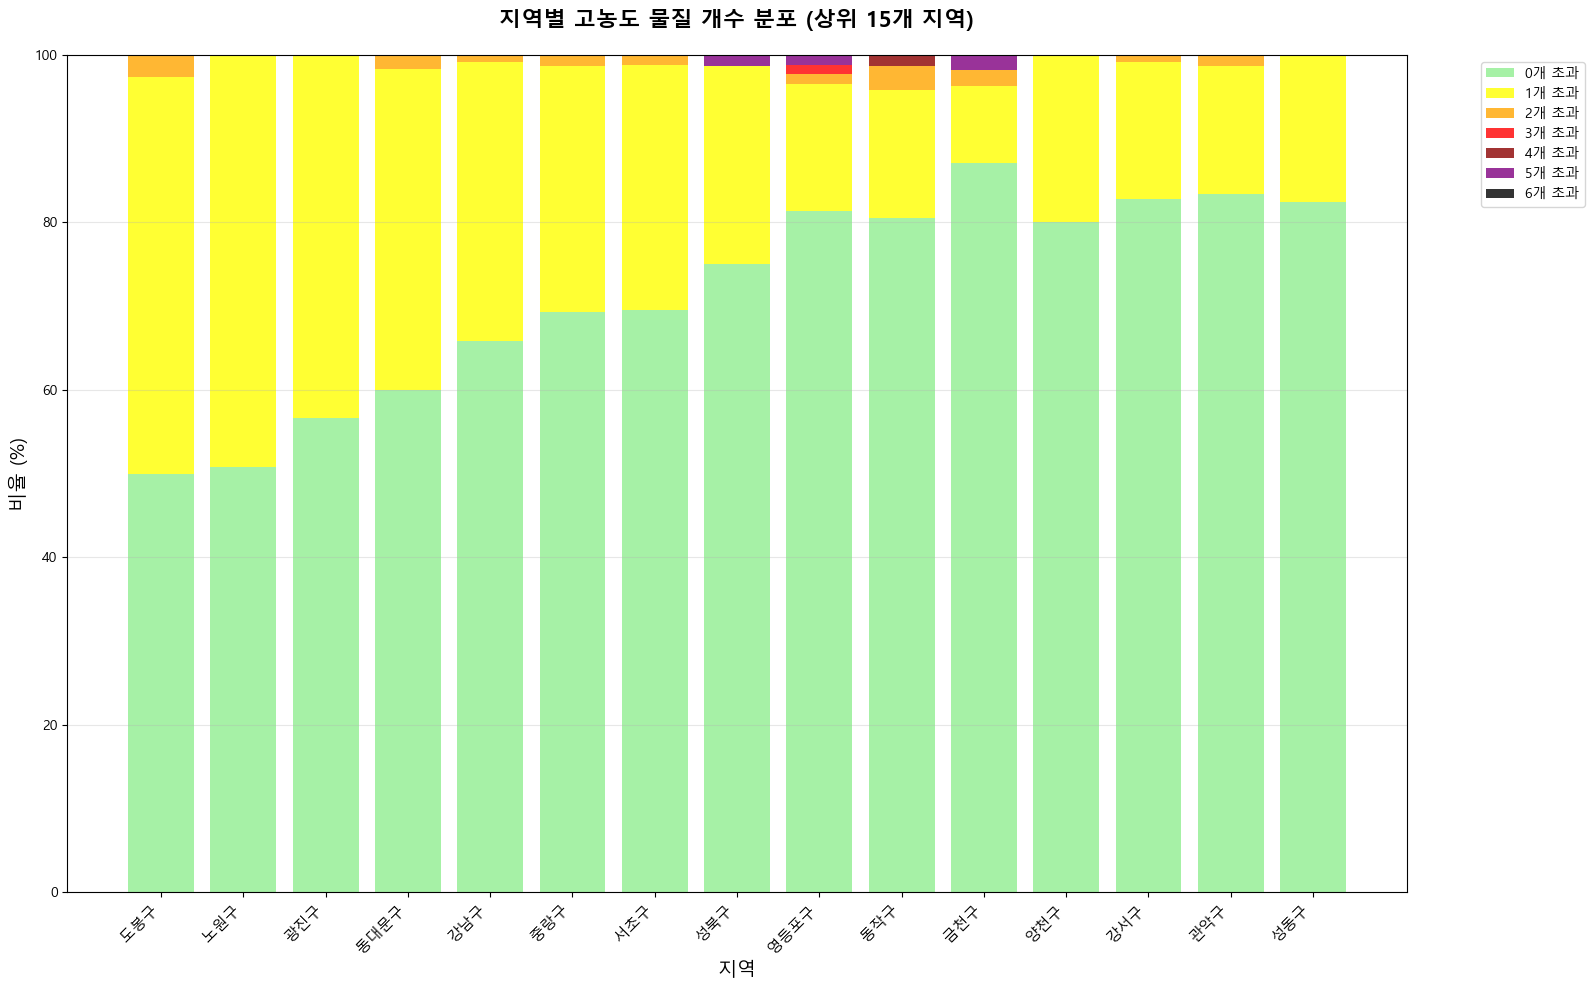


=== 다중 오염(2개 이상 초과) 비율 상위 10개 지역 ===
10. 동작구: 4.2% (3/72)
9. 금천구: 3.7% (2/54)
8. 영등포구: 3.5% (3/86)
7. 도봉구: 2.6% (2/76)
6. 송파구: 1.9% (3/154)
5. 동대문구: 1.7% (1/60)
4. 성북구: 1.3% (1/76)
3. 중랑구: 1.3% (1/78)
2. 관악구: 1.3% (1/78)
1. 서초구: 1.2% (1/82)


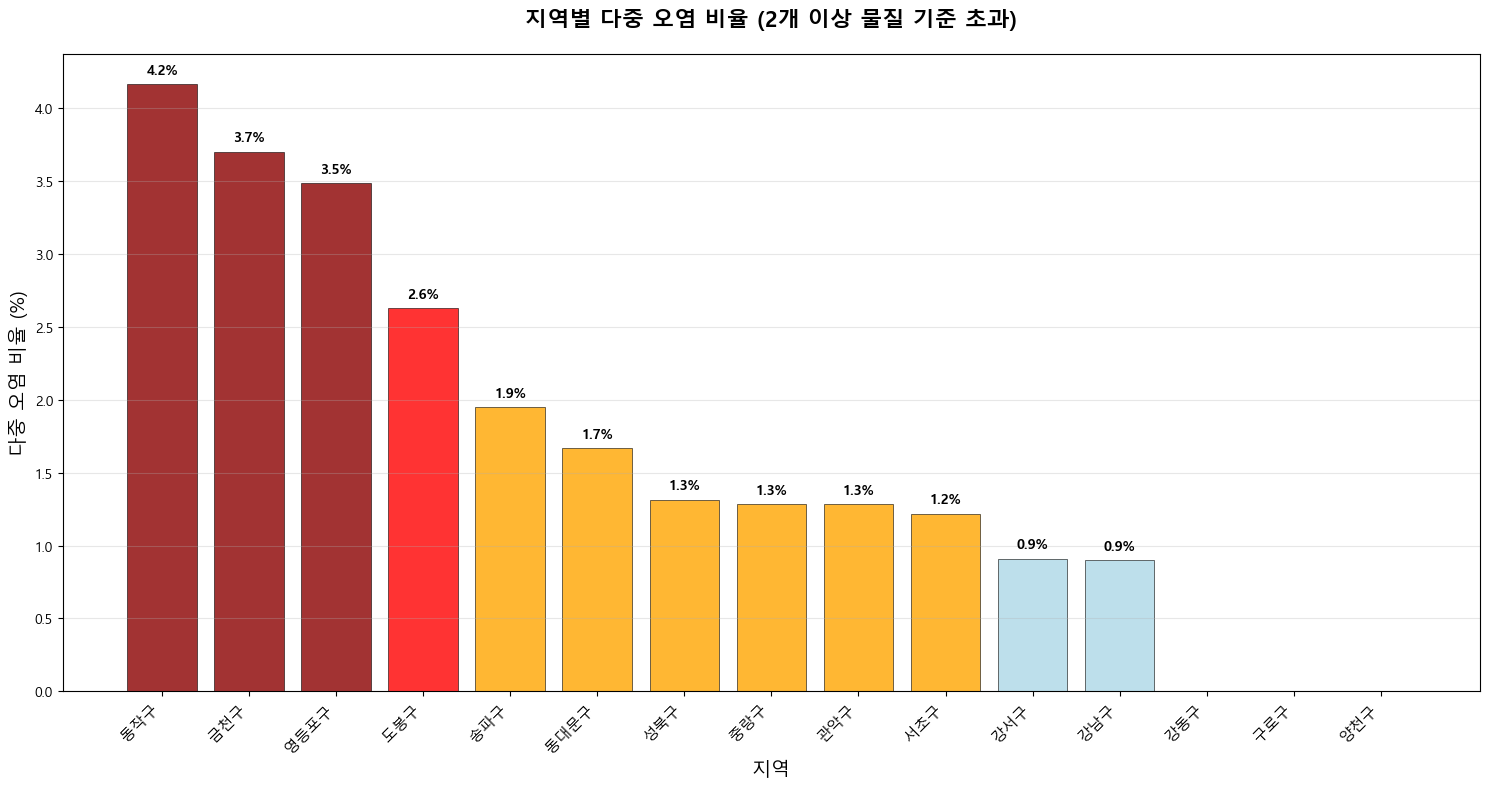

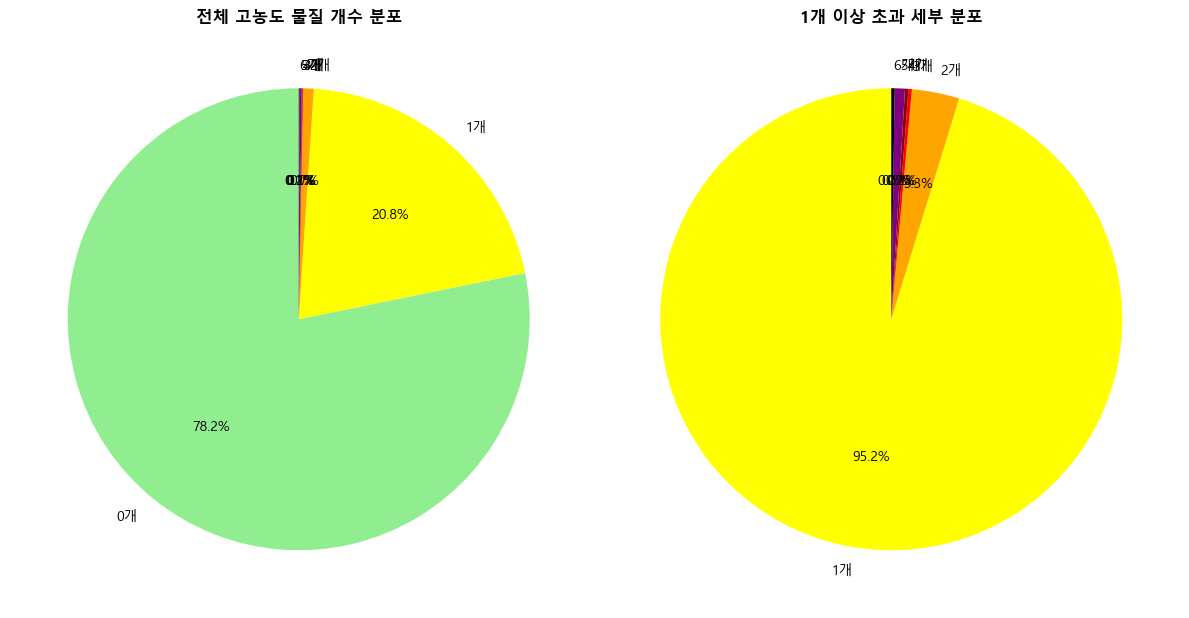

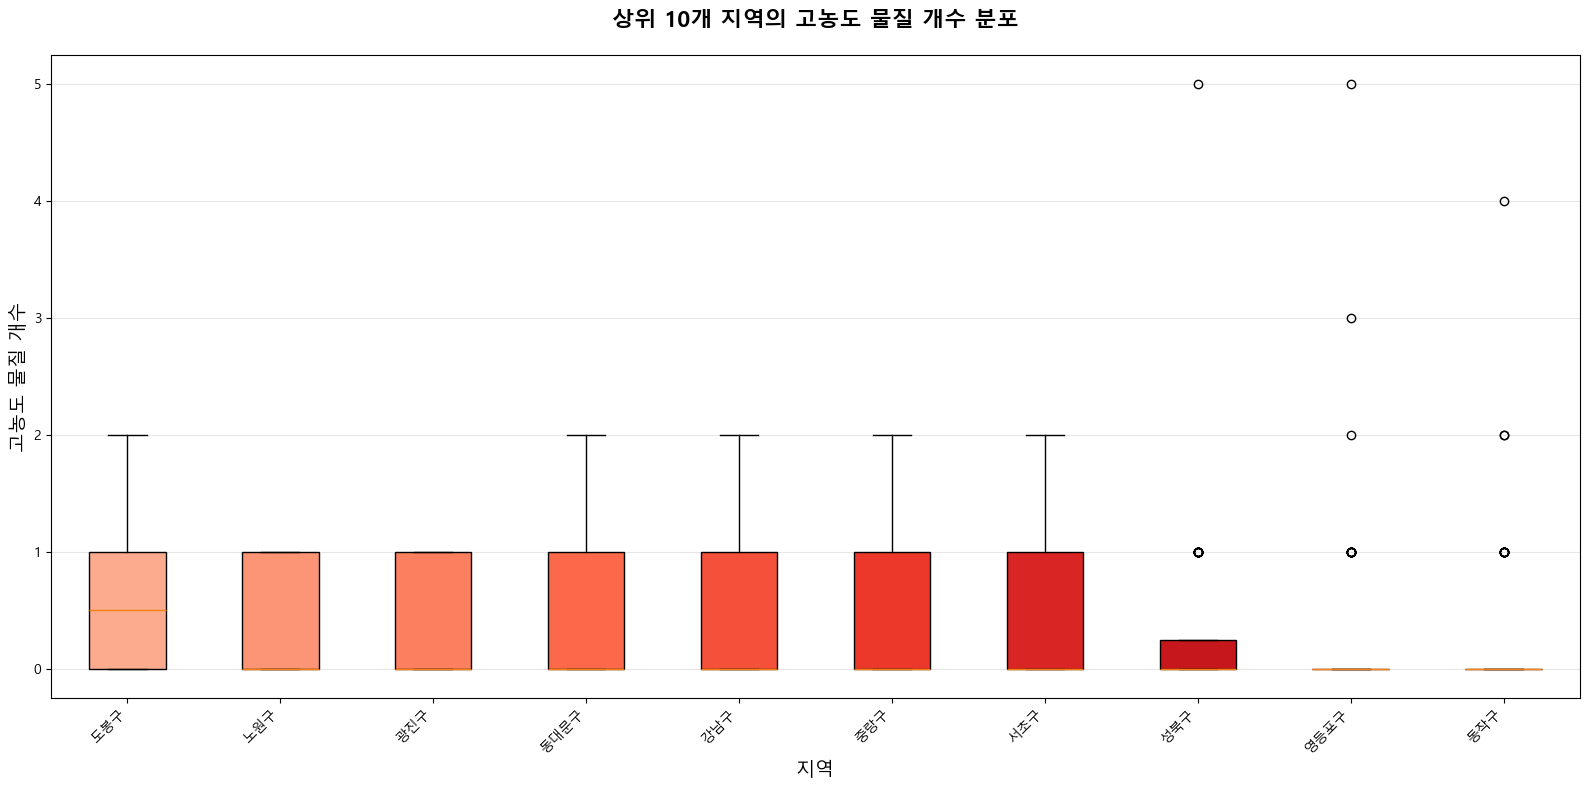


=== 최종 분석 결과 ===
🏆 평균 고농도 물질 개수 1위: 도봉구 (0.526개)
⚠️  다중 오염 비율 1위: 동작구 (4.2%)
📊 전체 평균 고농도 물질 개수: 0.237개
🎯 1개 이상 초과 비율: 21.8%
🚨 2개 이상 초과 비율: 1.0%

=== 위험도 등급별 지역 분류 ===
고위험군 (평균 0.4개 초과): 도봉구, 노원구, 광진구, 동대문구
중위험군 (평균 0.2-0.4개): 강남구, 중랑구, 서초구, 성북구, 영등포구, 동작구, 금천구
저위험군 (평균 0.2개 이하): 양천구, 강서구, 관악구, 성동구, 마포구, 용산구, 송파구, 서대문구, 은평구, 구로구, 강북구, 중구, 강동구, 종로구


In [ ]:
# 고농도 오염 기준 정의
high_pollution_criteria = {
    'AIR_BACT': 800,
    'FALL_BACT': 10,
    'MITE': 100,
    'RN': 148,
    'O3': 0.06,
    'ASBESTOS': 0.01
}

print("=== 고농도 오염 기준 ===")
for substance, threshold in high_pollution_criteria.items():
    print(f"{substance}: >= {threshold}")

# 지역명 단축
df['지역'] = df['ADRCD_NM'].str.replace('서울특별시 ', '')

# 각 행마다 고농도 기준에 해당하는 물질 개수 계산
def count_high_pollution_substances(row):
    count = 0
    exceeding_substances = []
    
    for substance, threshold in high_pollution_criteria.items():
        if pd.notna(row[substance]) and row[substance] >= threshold:
            count += 1
            exceeding_substances.append(substance)
    
    return count, exceeding_substances

# 고농도 물질 개수 계산
pollution_counts = df.apply(lambda row: count_high_pollution_substances(row), axis=1)
df['고농도_물질_개수'] = [x[0] for x in pollution_counts]
df['초과_물질_리스트'] = [x[1] for x in pollution_counts]

print(f"\n=== 전체 데이터 현황 ===")
print(f"총 데이터 수: {len(df)}")

# 고농도 물질 개수별 분포
count_distribution = df['고농도_물질_개수'].value_counts().sort_index()
print(f"\n=== 고농도 물질 개수별 분포 ===")
for count, frequency in count_distribution.items():
    percentage = (frequency / len(df)) * 100
    print(f"{count}개 물질 초과: {frequency}건 ({percentage:.1f}%)")

# 지역별 분석
regional_analysis = df.groupby('지역').agg({
    '고농도_물질_개수': ['count', 'sum', 'mean', 'std'],
    'SCHUL_NM': 'count'
}).round(3)

regional_analysis.columns = ['총_데이터수', '총_초과건수', '평균_초과개수', '표준편차', '학교수']
regional_analysis['초과_비율'] = (regional_analysis['총_초과건수'] / regional_analysis['총_데이터수'] * 100).round(1)

# 평균 초과 개수로 정렬
regional_analysis_sorted = regional_analysis.sort_values('평균_초과개수', ascending=False)

print(f"\n=== 지역별 평균 고농도 물질 개수 (상위 15개) ===")
for i, (region, data) in enumerate(regional_analysis_sorted.head(15).iterrows(), 1):
    print(f"{i:2d}. {region}: 평균 {data['평균_초과개수']:.2f}개 (총 {int(data['총_초과건수'])}/{int(data['총_데이터수'])})")

# 1. 지역별 평균 고농도 물질 개수 막대그래프
plt.figure(figsize=(16, 10))
top_regions = regional_analysis_sorted.head(20)

bars = plt.bar(range(len(top_regions)), top_regions['평균_초과개수'], 
               color=['darkred' if x > 0.4 else 'red' if x > 0.3 else 'orange' if x > 0.2 else 'lightblue' 
                      for x in top_regions['평균_초과개수']],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('지역별 평균 고농도 물질 개수\n(각 행마다 기준 초과 물질 개수의 평균)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('지역', fontsize=14)
plt.ylabel('평균 고농도 물질 개수', fontsize=14)
plt.xticks(range(len(top_regions)), top_regions.index, rotation=45, ha='right', fontsize=11)

# 상위 10개 지역에 값 표시
for i in range(min(10, len(bars))):
    height = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2., height + 0.005,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 전체 평균선 추가
overall_avg = df['고농도_물질_개수'].mean()
plt.axhline(y=overall_avg, color='blue', linestyle='--', alpha=0.7, linewidth=2,
            label=f'전체 평균: {overall_avg:.3f}')

plt.legend(fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 지역별 고농도 물질 개수 분포 스택 바 차트
# 상위 15개 지역의 0~6개 분포
top_15_regions = regional_analysis_sorted.head(15).index

region_count_matrix = pd.DataFrame(index=top_15_regions, columns=range(7))
for region in top_15_regions:
    region_data = df[df['지역'] == region]['고농도_물질_개수'].value_counts()
    for count in range(7):
        region_count_matrix.loc[region, count] = region_data.get(count, 0)

# 비율로 변환
region_count_ratio = region_count_matrix.div(region_count_matrix.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 10))
colors = ['lightgreen', 'yellow', 'orange', 'red', 'darkred', 'purple', 'black']
bottom = np.zeros(len(top_15_regions))

for count in range(7):
    plt.bar(range(len(top_15_regions)), region_count_ratio[count], 
            bottom=bottom, label=f'{count}개 초과', color=colors[count], alpha=0.8)
    bottom += region_count_ratio[count]

plt.title('지역별 고농도 물질 개수 분포 (상위 15개 지역)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('지역', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(range(len(top_15_regions)), top_15_regions, rotation=45, ha='right', fontsize=11)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 다중 오염 (2개 이상 초과) 분석
multi_pollution_analysis = []
for region in df['지역'].unique():
    region_data = df[df['지역'] == region]
    total_count = len(region_data)
    multi_count = len(region_data[region_data['고농도_물질_개수'] >= 2])
    multi_ratio = (multi_count / total_count) * 100 if total_count > 0 else 0
    
    multi_pollution_analysis.append({
        '지역': region,
        '전체_데이터수': total_count,
        '다중오염_건수': multi_count,
        '다중오염_비율': multi_ratio
    })

multi_pollution_df = pd.DataFrame(multi_pollution_analysis)
multi_pollution_df = multi_pollution_df.sort_values('다중오염_비율', ascending=False)

print(f"\n=== 다중 오염(2개 이상 초과) 비율 상위 10개 지역 ===")
for i, row in multi_pollution_df.head(10).iterrows():
    print(f"{len(multi_pollution_df.head(10)) - list(multi_pollution_df.head(10).index).index(i)}. {row['지역']}: {row['다중오염_비율']:.1f}% ({int(row['다중오염_건수'])}/{int(row['전체_데이터수'])})")

# 4. 다중 오염 비율 막대그래프
plt.figure(figsize=(15, 8))
top_multi = multi_pollution_df.head(15)

bars = plt.bar(range(len(top_multi)), top_multi['다중오염_비율'],
               color=['darkred' if x > 3 else 'red' if x > 2 else 'orange' if x > 1 else 'lightblue'
                      for x in top_multi['다중오염_비율']],
               alpha=0.8, edgecolor='black', linewidth=0.5)

plt.title('지역별 다중 오염 비율 (2개 이상 물질 기준 초과)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('지역', fontsize=14)
plt.ylabel('다중 오염 비율 (%)', fontsize=14)
plt.xticks(range(len(top_multi)), top_multi['지역'], rotation=45, ha='right', fontsize=11)

# 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. 전체 분포 파이차트
plt.figure(figsize=(12, 8))

# 왼쪽: 전체 분포
plt.subplot(1, 2, 1)
count_dist = df['고농도_물질_개수'].value_counts().sort_index()
colors_pie = ['lightgreen', 'yellow', 'orange', 'red', 'darkred', 'purple', 'black']
plt.pie(count_dist.values, labels=[f'{i}개' for i in count_dist.index], 
        autopct='%1.1f%%', colors=colors_pie[:len(count_dist)], startangle=90)
plt.title('전체 고농도 물질 개수 분포', fontweight='bold')

# 오른쪽: 1개 이상 초과의 세부 분포
plt.subplot(1, 2, 2)
exceeding_data = count_dist[count_dist.index >= 1]
if len(exceeding_data) > 0:
    plt.pie(exceeding_data.values, labels=[f'{i}개' for i in exceeding_data.index],
            autopct='%1.1f%%', colors=colors_pie[1:len(exceeding_data)+1], startangle=90)
    plt.title('1개 이상 초과 세부 분포', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. 박스플롯: 상위 지역별 고농도 물질 개수 분포
plt.figure(figsize=(16, 8))
top_10_regions = regional_analysis_sorted.head(10).index
plot_data = []
plot_labels = []

for region in top_10_regions:
    region_counts = df[df['지역'] == region]['고농도_물질_개수']
    plot_data.append(region_counts)
    plot_labels.append(region)

box_plot = plt.boxplot(plot_data, labels=plot_labels, patch_artist=True)
colors_box = plt.cm.Reds(np.linspace(0.3, 0.9, len(box_plot['boxes'])))
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)

plt.title('상위 10개 지역의 고농도 물질 개수 분포', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('지역', fontsize=14)
plt.ylabel('고농도 물질 개수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 최종 요약
print(f"\n=== 최종 분석 결과 ===")
print(f"🏆 평균 고농도 물질 개수 1위: {regional_analysis_sorted.index[0]} ({regional_analysis_sorted.iloc[0]['평균_초과개수']:.3f}개)")
print(f"⚠️  다중 오염 비율 1위: {multi_pollution_df.iloc[0]['지역']} ({multi_pollution_df.iloc[0]['다중오염_비율']:.1f}%)")
print(f"📊 전체 평균 고농도 물질 개수: {overall_avg:.3f}개")
print(f"🎯 1개 이상 초과 비율: {(len(df[df['고농도_물질_개수'] >= 1]) / len(df) * 100):.1f}%")
print(f"🚨 2개 이상 초과 비율: {(len(df[df['고농도_물질_개수'] >= 2]) / len(df) * 100):.1f}%")

# 위험도 등급별 지역 분류
print(f"\n=== 위험도 등급별 지역 분류 ===")
high_risk = regional_analysis_sorted[regional_analysis_sorted['평균_초과개수'] > 0.4].index.tolist()
medium_risk = regional_analysis_sorted[(regional_analysis_sorted['평균_초과개수'] > 0.2) & 
                                       (regional_analysis_sorted['평균_초과개수'] <= 0.4)].index.tolist()
low_risk = regional_analysis_sorted[regional_analysis_sorted['평균_초과개수'] <= 0.2].index.tolist()